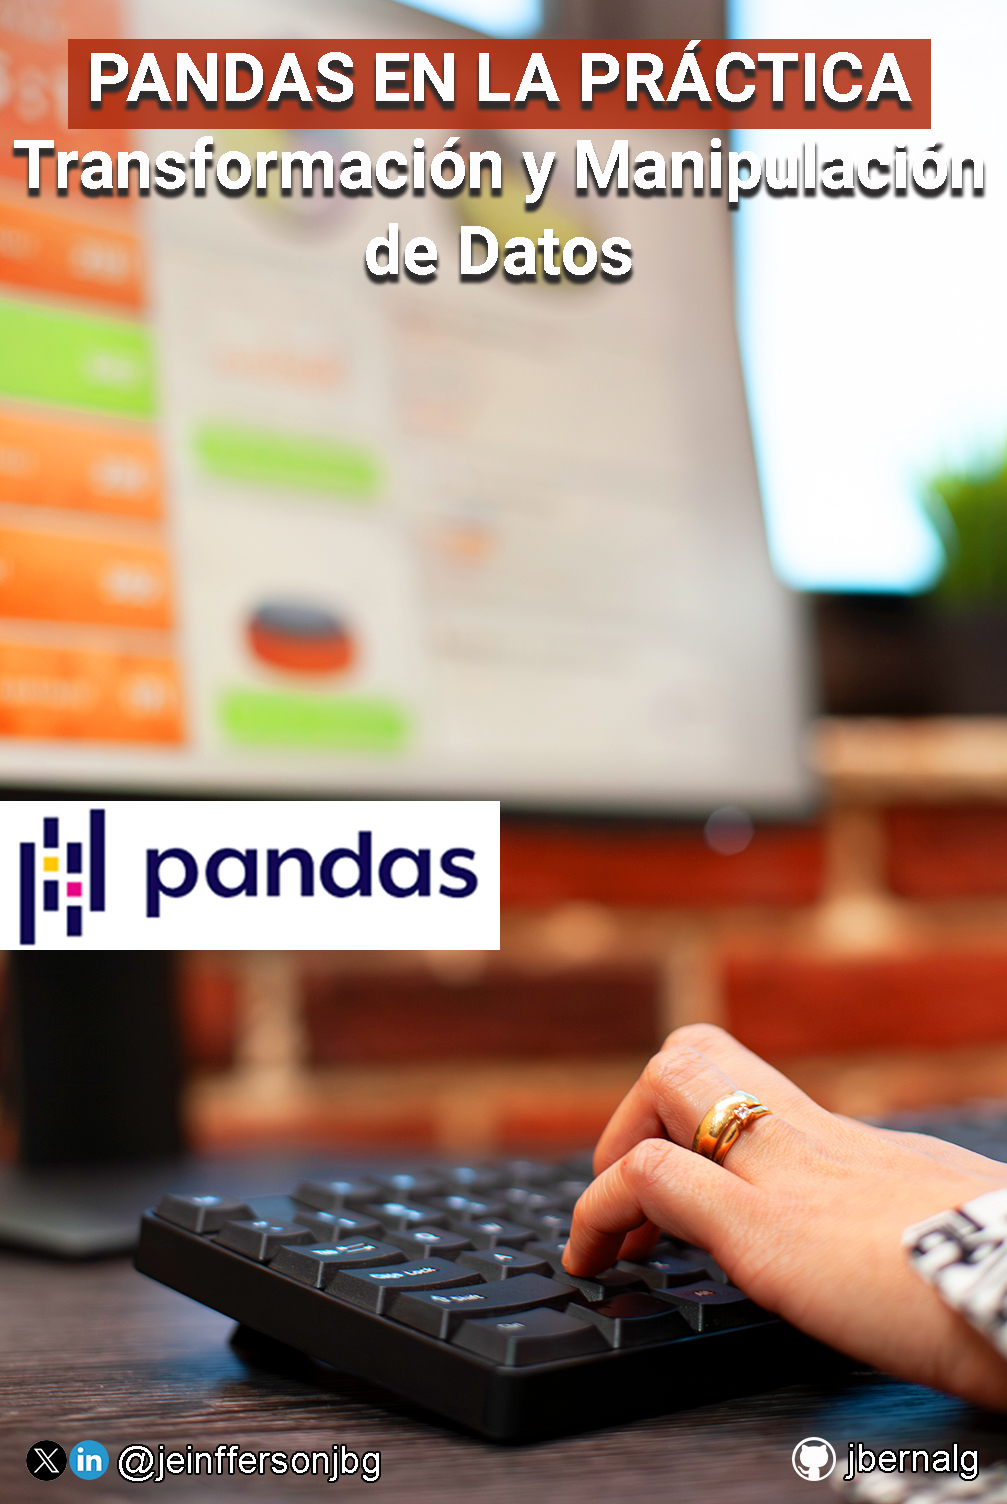

# __Tratamiento de datos: Alquileres de propiedades a corto plazo__

## Entendiendo el problema

En el siguiente proyecto, vamos a transformar y manipular los datos de características de propiedades (comodidades, tamaño, ocupación del espacio en un período determinado,...) para así conocer las funciones y métodos que nos brinda Pandas para realizar esta tarea. Y lo mejor de todo, de forma práctica!

## Importar librerías

In [73]:
import pandas as pd

## Cargar datos

In [74]:
df = pd.read_json('./data_in/datos_hosting.json')
df.head()

,info_inmuebles
0,"{'evaluacion_general': '10.0', 'experiencia_lo..."
1,"{'evaluacion_general': '10.0', 'experiencia_lo..."
2,"{'evaluacion_general': '10.0', 'experiencia_lo..."
3,"{'evaluacion_general': '10.0', 'experiencia_lo..."
4,"{'evaluacion_general': '10.0', 'experiencia_lo..."


Normalizamos el dataframe para darle un mejor formato a los datos json.

In [75]:
datos = pd.json_normalize(df['info_inmuebles'])
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$0, $0, $0, $0, $0, $350.00, $350.00, $350.00...","[$0, $0, $0, $20.00, $15.00, $28.00, $35.00, $...","[$110.00, $45.00, $55.00, $52.00, $85.00, $50...."
1,10.0,--,10,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...","[2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]","[3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]","[5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$500.00, $300.00, $0, $300.00, $300.00, $360....","[$125.00, $100.00, $85.00, $110.00, $110.00, $...","[$350.00, $300.00, $425.00, $300.00, $285.00, ..."
2,10.0,--,11,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,[4],[5],[7],[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$1,000.00]",[$300.00],[$975.00]
3,10.0,--,12,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,"[3, 3, 3, 3, 3, 3, 3, 3]","[6, 6, 5, 5, 5, 5, 4, 4]","[6, 6, 7, 8, 7, 7, 6, 6]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$500.00, $500.00, $500.00, $500.00, $500.00, ...","[$225.00, $300.00, $250.00, $250.00, $250.00, ...","[$490.00, $550.00, $350.00, $350.00, $350.00, ..."
4,10.0,--,14,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,"[2, 3]","[2, 6]","[3, 9]","[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$300.00, $2,000.00]","[$40.00, $150.00]","[$200.00, $545.00]"


## Contexto de los datos

Para avanzar en nuestros estudios sobre los datos proporcionados, vamos a entendere qué información trae cada columna.

- __evaluacion_general__: se refiere a la puntuación media otorgada para evaluar el alojamiento en la propiedad.

- __experiencia_local__: describe las experiencias ofrecidas durante su estancia en la propiedad.

- __max_hospedes__: informa el número máximo de invitados que permite la ubicación.

- __descripcion_local__: describe la propiedad.

- __descripcion_vecindad__: describe el vecindario alrededor de la propiedad.

- __cantidad_baños__: informa el número de baños disponibles.

- __cantidad_cuartos__: informa el número de habitaciones disponibles.

- __cantidad_camas__: informa el número de camas disponibles.

- __modelo_cama__: informa el modelo de cama ofrecido.

- __comodidades__: informa las comodidades que ofrece la propiedad.

- __cuota_deposito__: informa la tarifa mínima de depósito para la seguridad del hosting.

- __cuota_limpieza__: informa el cargo cobrado por el servicio de limpieza.

- __precio__: se refiere al precio base a cobrar por la estancia diaria en la propiedad.

## Formato de los datos

In [76]:
# obtener los nombres de las variables
columnas = list(datos.columns)
columnas

['evaluacion_general',
 'experiencia_local',
 'max_hospedes',
 'descripcion_local',
 'descripcion_vecindad',
 'cantidad_baños',
 'cantidad_cuartos',
 'cantidad_camas',
 'modelo_cama',
 'comodidades',
 'cuota_deposito',
 'cuota_limpieza',
 'precio']

> Notamos que, a partir de la variable _descripcion_local_ en adelante, los datos se presentan como listas por lo que debemos formatearlas. Para ello utilizamos la función _explode()_

> En la lista anterior, se inicia desde la posición 3 hasta el resto de variables.

In [77]:
# expandir datos contenidos en listas
datos = datos.explode(columnas[3:])
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
0,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
0,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
0,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
0,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


> La variable _comodidades_ es la única que queda con formato de diccionario.

> El nuevo dataframe presenta índices repetidos, por lo que debemos formatearlo de forma que no se repitan.

In [78]:
# resetear indice
datos.reset_index(inplace=True, drop=True)
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


Echemos un vistazo a la información para cada variable.

In [79]:
# informacion general de las variables
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   object
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   object
 6   cantidad_cuartos      3818 non-null   object
 7   cantidad_camas        3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: object(13)
memory usage: 387.9+ KB


> Aumentó la cantidad de registros debido al formateo de los datos.

> Todas la variables son de tipo 'object' lo cual es un problema ya que hay variables con solo valores numéricos.

> No se presentan valores faltantes en las variables.

> las variables _evaluacion_general_, _max_hospedes_, _cantidad_baños_, _cantidad_cuartos_, _cantidad_camas_, _cuota_deposito_, _cuota_limpieza_ y _precio_ debemos convertirla a tipo numérico. 

## Tratamiento de datos numérico

In [80]:
# importar libreria para la conversion a datos numericos
import numpy as np

In [81]:
# convertir variable 'max_hospedes' a tipo entero
datos['max_hospedes'] = datos['max_hospedes'].astype(np.int64)

> Es importante que antes de hacer la conversión del tipo de dato, verificar que los valores de la variable sean del mismo tipo ya que un valor de tipo diferente generará un error.

In [82]:
# identificar variables numericas enteras
col_enteras = ['cantidad_baños', 'cantidad_cuartos', 'cantidad_camas']

# cambiar el tipo de dato de varias variables en una sola operacion
datos[col_enteras] = datos[col_enteras].astype(np.int64)

# verificar que los cambios han sido correctos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   int64 
 6   cantidad_cuartos      3818 non-null   int64 
 7   cantidad_camas        3818 non-null   int64 
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: int64(4), object(9)
memory usage: 387.9+ KB


In [83]:
# convertir variable 'evaluacion_general' a flotante
datos['evaluacion_general'] = datos['evaluacion_general'].astype(np.float64)

Vamos a convertir los valores de '_precio_', que es de tipo string, a tipo numérico omitiendo el signo de dólar.

In [84]:
datos['precio']

0       $110.00
1        $45.00
2        $55.00
3        $52.00
4        $85.00
         ...   
3813    $299.00
3814    $199.00
3815    $400.00
3816    $250.00
3817    $350.00
Name: precio, Length: 3818, dtype: object

In [85]:
# aplicar funcion lambda para eliminar el simbolo de dolar, comas y espacios en blanco a los valores  
datos['precio'] = datos['precio'].apply(lambda x: x.replace('$','').replace(',','').strip())

# verificar que los cambios se han hecho
datos['precio'][:5]

0    110.00
1     45.00
2     55.00
3     52.00
4     85.00
Name: precio, dtype: object

In [86]:
# cambiar el tipo de dato a float
datos['precio'] = datos['precio'].astype(np.float64)

# verificar cambio
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   object 
 11  cuota_limpieza        3818 non-null   object 
 12  precio                3818 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 387.9+ KB


Las variables '_cuota_deposito_' y '_cuota_limpieza_' también requieren cambiar el tipo de dato a numérico. Vamos hacer estos cambios en las dos variables al mismo tiempo.

In [87]:
datos[['cuota_deposito', 'cuota_limpieza']]

,cuota_deposito,cuota_limpieza
0,$0,$0
1,$0,$0
2,$0,$0
3,$0,$20.00
4,$0,$15.00
...,...,...
3813,"$1,000.00",$178.00
3814,$0,$99.00
3815,$0,$0
3816,"$1,000.00",$150.00


In [88]:
# aplicar funcion lambda para eliminar el simbolo de dolar, comas y quitar los espacios en blanco
datos[['cuota_deposito', 'cuota_limpieza']] = datos[['cuota_deposito', 'cuota_limpieza']].applymap(lambda x: x.replace('$','').replace(',','').strip())

datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0,0,110.0
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0,0,45.0
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0,0,55.0
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0,20.00,52.0
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0,15.00,85.0


In [89]:
# convertir tipo de dato a float
datos[['cuota_deposito', 'cuota_limpieza']] = datos[['cuota_deposito', 'cuota_limpieza']].astype(np.float64)

# verificar cambios
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   float64
 11  cuota_limpieza        3818 non-null   float64
 12  precio                3818 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 387.9+ KB


## Tratamiento de datos de texto

Las variables _descripcion_local_ y _descripcion_vecindad_ son de tipo string y efectivamente, sus valores son textos que corresponde a los descripción del inmueble y sus alrededores hecha por los propietarios. Vamos a limpiarlos, eliminando carácteres que no brindan información relevante como signos de puntuación, carácteres especiales, entre otros.

In [90]:
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,0.0,110.0
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,45.0
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,55.0
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,20.0,52.0
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0.0,15.0,85.0


__1. descripcion_local__

In [91]:
# 5 primeros registros de los datos de descripcion_local
datos['descripcion_local'][:5]

0    This clean and comfortable one bedroom sits ri...
1    Our century old Upper Queen Anne house is loca...
2    Cozy room in two-bedroom apartment along the l...
3    Very lovely and cozy room for one. Convenientl...
4    The “Studio at Mibbett Hollow' is in a Beautif...
Name: descripcion_local, dtype: object

In [92]:
# convertir strings a minuscula
datos['descripcion_local'] = datos['descripcion_local'].str.lower()
datos['descripcion_local'][:5]

0    this clean and comfortable one bedroom sits ri...
1    our century old upper queen anne house is loca...
2    cozy room in two-bedroom apartment along the l...
3    very lovely and cozy room for one. convenientl...
4    the “studio at mibbett hollow' is in a beautif...
Name: descripcion_local, dtype: object

Ahora, procedemos a eliminar caracteres especiales de los texto utilizando expresiones regulares

In [93]:
# examinar un registro especifico
datos['descripcion_local'][3169]

"built, run and supported by seattle tech and start up veterans, grokhome's focus is to create a supportive environment for smart people working on interesting projects, start ups and more. this listing is an upper bunk, in a 2-person shared room. *note: this fall, there will be major renovations happening on one kitchen and bathroom at a time. there will always be two other working kitchens and two working bathrooms in the house. we'll work to minimize the impact these renovations have on your stay. **this listing is only available to those working in the tech/science space. live in a hacker house, and immerse yourself in the seattle tech scene. you can expect to be surrounded by smart people solving big problems or working on something fun. we have frequent demo nights, and love when our guests share something they are passionate about. if you're new to the city, our deep ties to the seattle tech scene can help you get involved. expand your network, develop your ideas, and learn some

In [94]:
# expresion regex que deja solo letras minusculas, mayusculas, numeros, guion y comilla simple en el texto
# '[^a-zA-Z0-9\-\']'
datos['descripcion_local'] = datos['descripcion_local'].str.replace('[^a-zA-Z0-9\-\']',' ',regex=True)
datos['descripcion_local'][:5]

0    this clean and comfortable one bedroom sits ri...
1    our century old upper queen anne house is loca...
2    cozy room in two-bedroom apartment along the l...
3    very lovely and cozy room for one  convenientl...
4    the  studio at mibbett hollow' is in a beautif...
Name: descripcion_local, dtype: object

In [95]:
# expresion regex que permite guion entre palabras: '(?<!\w)-(?!\w)'
datos['descripcion_local'] = datos['descripcion_local'].str.replace('(?<!\w)-(?!\w)',' ',regex=True)
datos['descripcion_local'][:5]

0    this clean and comfortable one bedroom sits ri...
1    our century old upper queen anne house is loca...
2    cozy room in two-bedroom apartment along the l...
3    very lovely and cozy room for one  convenientl...
4    the  studio at mibbett hollow' is in a beautif...
Name: descripcion_local, dtype: object

__2. descripcion_vecindad__

In [96]:
# convertir strings a minuscula
datos['descripcion_vecindad'] = datos['descripcion_vecindad'].str.lower()
datos['descripcion_vecindad'][:5]

0    lower queen anne is near the seattle center (s...
1    upper queen anne is a really pleasant, unique ...
2    the convenience of being in seattle but on the...
3    ballard is lovely, vibrant and one of the most...
4                                                   --
Name: descripcion_vecindad, dtype: object

In [97]:
# examinar un registro especifico
datos['descripcion_vecindad'][3169]

'wallingford is a mostly-residential neighborhood, situated between the restaurants, bars and nightlife of fremont or ballard, and the buzzing, academic university district.'

In [98]:
# expresion regex que deja solo letras minusculas, mayusculas, numeros, guion y comilla simple en el texto
# '[^a-zA-Z0-9\-\']'
datos['descripcion_vecindad'] = datos['descripcion_vecindad'].str.replace('[^a-zA-Z0-9\-\']',' ',regex=True)
datos['descripcion_vecindad'][:5]

0    lower queen anne is near the seattle center  s...
1    upper queen anne is a really pleasant  unique ...
2    the convenience of being in seattle but on the...
3    ballard is lovely  vibrant and one of the most...
4                                                   --
Name: descripcion_vecindad, dtype: object

## Tokenización de las palabras

Consiste en dividir las frases en listas de palabras. Vamos a aplicarlo sobre las descripciones para luego, con un proceso de Machine Learning, identificar las palabras más relevantes sobre el precio final.

In [99]:
datos['descripcion_local'] = datos['descripcion_local'].str.split()
datos['descripcion_local'][:5]

0    [this, clean, and, comfortable, one, bedroom, ...
1    [our, century, old, upper, queen, anne, house,...
2    [cozy, room, in, two-bedroom, apartment, along...
3    [very, lovely, and, cozy, room, for, one, conv...
4    [the, studio, at, mibbett, hollow', is, in, a,...
Name: descripcion_local, dtype: object

In [100]:
datos['descripcion_vecindad'] = datos['descripcion_vecindad'].str.split()
datos['descripcion_vecindad'][:5]

0    [lower, queen, anne, is, near, the, seattle, c...
1    [upper, queen, anne, is, a, really, pleasant, ...
2    [the, convenience, of, being, in, seattle, but...
3    [ballard, is, lovely, vibrant, and, one, of, t...
4                                                 [--]
Name: descripcion_vecindad, dtype: object

La variable '_comodidades_' presenta una agrupación de palabras dentro de un diccionario. Vamos a usar regex para eliminar las llaves y carácteres especiales y de esta forma, tener la información mejor estructurada.

In [101]:
# expresion regex que elimina llaves, caracteres especiales '\{|}|\"'
datos['comodidades'] = datos['comodidades'].str.replace('\{|}|\"','', regex=True)
datos['comodidades'][:5]

0    Internet,Wireless Internet,Kitchen,Free Parkin...
1    TV,Internet,Wireless Internet,Kitchen,Free Par...
2    TV,Internet,Wireless Internet,Kitchen,Free Par...
3    Internet,Wireless Internet,Kitchen,Free Parkin...
4    Wireless Internet,Kitchen,Free Parking on Prem...
Name: comodidades, dtype: object

Ahora volvamos elementos de lista, cada valor de '_comodidades_' para darle la estructura de tokenización.

In [102]:
datos['comodidades'] = datos['comodidades'].str.split(',')
datos['comodidades'][:5]

0    [Internet, Wireless Internet, Kitchen, Free Pa...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
2    [TV, Internet, Wireless Internet, Kitchen, Fre...
3    [Internet, Wireless Internet, Kitchen, Free Pa...
4    [Wireless Internet, Kitchen, Free Parking on P...
Name: comodidades, dtype: object

## Tratamiento de datos de tiempo

Tenemos una base de datos adicional que contiene los lugares disponibles en varios inmuebles de alojamiento durante el año 2016.

In [103]:
dt_data = pd.read_json('./data_in/inmuebles_disponibles.json')
dt_data.head()

,id,fecha,lugar_disponible,precio
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None


In [104]:
# tipo de datos del dataframe
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                365000 non-null  int64 
 1   fecha             365000 non-null  object
 2   lugar_disponible  365000 non-null  bool  
 3   precio            270547 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 11.5+ MB


> La variable '_precio_' presenta valores faltantes.

> La variable '_fecha_' no se encuentra en el formato correcto, por lo que debemos modificarlo.

In [105]:
# convertir variable fecha a tipo datetime64
dt_data['fecha'] = pd.to_datetime(dt_data['fecha'])
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                365000 non-null  int64         
 1   fecha             365000 non-null  datetime64[ns]
 2   lugar_disponible  365000 non-null  bool          
 3   precio            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


Como el objetivo es estimar el precio de los inmuebles, registros sin esta información no nos aporta valor para el análisis, por tanto, eliminamos tales registros.

In [106]:
# cantidad de valores nulos en 'precio'
dt_data.precio.isnull().sum()

94453

In [107]:
# eliminar registros con valores nulo en 'precio'
dt_data = dt_data.dropna(subset=['precio'])
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270547 entries, 56 to 364998
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                270547 non-null  int64         
 1   fecha             270547 non-null  datetime64[ns]
 2   lugar_disponible  270547 non-null  bool          
 3   precio            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 8.5+ MB


> Datos en el formato correcto y libre de valores nulos.

## Cuántos lugares disponibles habían por mes?

In [108]:
# mostrar primeros 5 registros
dt_data.head()

,id,fecha,lugar_disponible,precio
56,857,2016-02-29,True,$120.00
57,857,2016-03-01,True,$120.00
58,857,2016-03-02,True,$120.00
59,857,2016-03-03,True,$120.00
60,857,2016-03-04,True,$120.00


In [109]:
# convertir formato de fecha a ano-mes
dt_data['fecha'].dt.strftime('%Y-%m')

56        2016-02
57        2016-03
58        2016-03
59        2016-03
60        2016-03
           ...   
364994    2016-12
364995    2016-12
364996    2016-12
364997    2016-12
364998    2017-01
Name: fecha, Length: 270547, dtype: object

In [110]:
subset = dt_data.groupby(dt_data['fecha'].dt.strftime('%Y-%m'))['lugar_disponible'].sum()
subset

fecha
2016-01    16543
2016-02    20128
2016-03    23357
2016-04    22597
2016-05    23842
2016-06    23651
2016-07    22329
2016-08    22529
2016-09    22471
2016-10    23765
2016-11    23352
2016-12    24409
2017-01     1574
Name: lugar_disponible, dtype: int64